In [1]:
import json
import statistics
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist, squareform
import sklearn.cluster as cluster
import time
import scipy
import seaborn as sns
import random
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha': 0.25, 's':80, 'linewidths':0}

# set up type of service

In [2]:
# user input
user_input = 'Restaurants'
# u_id = 'McLqvYLBQoCFQikU9dC4cQ'

# read in business file, compose business categories, business rating on category and business postal code dictionary

In [12]:
# initialize business data
bcmap = {}
with open('./business.json','r') as bf:
    for line in bf:
        l = json.loads(line)
        
        key = l['business_id']
        #Business Category Dictionary
        category = l['categories']
        bcmap[key] = category

# generate top categories
category = {}
for i in bcmap:
    if user_input in bcmap[i]:
        for j in bcmap[i]:
            if j not in category:
                category[j] = 1
            else:
                category[j] += 1
top_cate = sorted(category.items(), key=lambda x:(-x[1]))[1:21]
tc = []
for i in top_cate:
    tc.append(i[0])
    
# initialize business data   
location = {}
bcrmap = {}
business_name = {}
with open('./business.json','r') as bf:
    for line in bf:
        l = json.loads(line)
        key = l['business_id']
        category = l['categories']
        
        # Business City Dictionary
        city = l['state']
        location[key] = city
        
        # Business -> Category -> Star Dictionary
        stars = l['stars']
        valid = False
        number_of_tc = 0
        if city not in bcrmap:
            bcrmap[city] = {}
        if key not in bcrmap[city]:
            bcrmap[city][key] = {}
        for i in category:
            if i in tc:
                number_of_tc += 1
                valid = True
                bcrmap[city][key].setdefault(i,[]).append(stars)
        if not valid or number_of_tc <3:
            del bcrmap[city][key]
            
            
        # Business name -> Address Dictionary
        name = l['name'] +','  + l['address'] +','  + l['city'] +',' + l['state']
        business_name[key] = name
        

# read in review file and generate user to category to rating map

In [31]:
# initialize user review data
# User -> Categories -> Stars
ucrmap = {}
test_urcmap = {}
user_rating = {}
with open('./review.json', 'r') as rv:
    for line in rv:
        n1 = json.loads(line)
        okey = n1['user_id']
        year = n1['date']
        ikeys = bcmap[n1['business_id']]
        bid = n1['business_id']
        value = n1['stars']
        city = location[bid]
        if city not in user_rating:
            user_rating[city] = {}
        user_rating[city].setdefault(okey, []).append(value)
        if city not in ucrmap:
            ucrmap[city]  = {}
        if city not in test_urcmap:
            test_urcmap[city]  = {}
        if int(n1['date'].split('-')[0]) < 2016:
            if okey not in ucrmap[city]:
                ucrmap[city][okey] = {}
            for ikey in ikeys:
                if ikey in tc:
                    ucrmap[city][okey].setdefault(ikey, []).append(value)
        else:
            if okey not in test_urcmap:
                test_urcmap[city][okey] = {}
            test_urcmap[city][okey][bid] = value

In [14]:
listCity = {}
for i in ucrmap:
    if i in bcrmap:
        listCity[i] = {}
        listCity[i]['user'] = len(ucrmap[i])
        listCity[i]['business'] = len(bcrmap[i])

In [16]:
len(listCity)

51

In [23]:
sorted(listCity.items(), key=lambda x: -x[1]['business'])

[('AZ', {'business': 2933, 'user': 227835}),
 ('ON', {'business': 2289, 'user': 67838}),
 ('NV', {'business': 1801, 'user': 307931}),
 ('OH', {'business': 1514, 'user': 40599}),
 ('PA', {'business': 1099, 'user': 37990}),
 ('NC', {'business': 1091, 'user': 47382}),
 ('QC', {'business': 679, 'user': 23852}),
 ('WI', {'business': 511, 'user': 19821}),
 ('BW', {'business': 341, 'user': 10648}),
 ('EDH', {'business': 319, 'user': 6766}),
 ('IL', {'business': 147, 'user': 7774}),
 ('SC', {'business': 67, 'user': 2966}),
 ('MLN', {'business': 12, 'user': 756}),
 ('HLD', {'business': 7, 'user': 448}),
 ('FIF', {'business': 5, 'user': 186}),
 ('NY', {'business': 3, 'user': 69}),
 ('NYK', {'business': 3, 'user': 142}),
 ('ST', {'business': 2, 'user': 36}),
 ('ELN', {'business': 2, 'user': 125}),
 ('WA', {'business': 2, 'user': 36}),
 ('C', {'business': 2, 'user': 70}),
 ('KHL', {'business': 1, 'user': 7}),
 ('ABE', {'business': 1, 'user': 6}),
 ('NI', {'business': 1, 'user': 47}),
 ('01', {'bus

In [22]:
sorted(listCity.items(), key=lambda x: -x[1]['user'])

[('NV', {'business': 1801, 'user': 307931}),
 ('AZ', {'business': 2933, 'user': 227835}),
 ('ON', {'business': 2289, 'user': 67838}),
 ('NC', {'business': 1091, 'user': 47382}),
 ('OH', {'business': 1514, 'user': 40599}),
 ('PA', {'business': 1099, 'user': 37990}),
 ('QC', {'business': 679, 'user': 23852}),
 ('WI', {'business': 511, 'user': 19821}),
 ('BW', {'business': 341, 'user': 10648}),
 ('IL', {'business': 147, 'user': 7774}),
 ('EDH', {'business': 319, 'user': 6766}),
 ('SC', {'business': 67, 'user': 2966}),
 ('MLN', {'business': 12, 'user': 756}),
 ('HLD', {'business': 7, 'user': 448}),
 ('FL', {'business': 0, 'user': 349}),
 ('FIF', {'business': 5, 'user': 186}),
 ('NYK', {'business': 3, 'user': 142}),
 ('ELN', {'business': 2, 'user': 125}),
 ('WLN', {'business': 1, 'user': 110}),
 ('C', {'business': 2, 'user': 70}),
 ('NY', {'business': 3, 'user': 69}),
 ('NI', {'business': 1, 'user': 47}),
 ('CA', {'business': 0, 'user': 44}),
 ('ST', {'business': 2, 'user': 36}),
 ('WA', {'

In [32]:
City_of_Data = 'NV'
filter_user = {}
valid_user = {}
valid_test_user = {}
for i in user_rating[City_of_Data]:
    if len(user_rating[City_of_Data][i]) >= 20:
        filter_user[i] = len(user_rating[City_of_Data][i])
raw = sorted(filter_user.items(), key=lambda x:-x[1])
valid_list = []
for k, v in raw:
    if k in ucrmap[City_of_Data] and k in test_urcmap[City_of_Data]:
        valid_list.append(k)
        valid_user[k] = ucrmap[City_of_Data][k]
        valid_test_user[k] = test_urcmap[City_of_Data][k]

In [33]:
len(user_rating)

51

In [34]:
len(filter_user)

10154

In [36]:
len(valid_user)

7274

In [37]:
len(valid_test_user)

7274

In [38]:
len(valid_list)

7274

# transform rating to vector format

In [39]:
def generate_nbcrmap(data):
    bcrmap = data
    for business in bcrmap:
        for k, v in bcrmap[business].items():
            bcrmap[business][k] = statistics.mean(v)

    for business in bcrmap:
        for i in tc:
            if i not in bcrmap[business]:
                bcrmap[business][i] = 3.12

    nbcrmap = {}
    for k, v in bcrmap.items():
        nbcrmap[k] = []
        value = []
        for i in tc:
            value.append(v[i])
        nbcrmap[k] = value
    return nbcrmap

nbcrmp = generate_nbcrmap(bcrmap[City_of_Data])

In [40]:
# Compose user category vector
def generate_nucrmap(data):
    ucrmap = data
    for user in ucrmap:
        for cate, value in ucrmap[user].items():
            ucrmap[user][cate] = statistics.mean(value)
    for user in ucrmap:
        for i in tc:
            if i not in ucrmap[user]:
                ucrmap[user][i] = 3.12

    nucrmap = {}
    for k, v in ucrmap.items():
        nucrmap[k] = []
        value = []
        for i in tc:
            value.append(v[i])
        nucrmap[k] = value
    return nucrmap

nucrmap = generate_nucrmap(valid_user)

In [41]:
data = nucrmap


In [42]:
listV = list(data.values())
listK = list(data.keys())


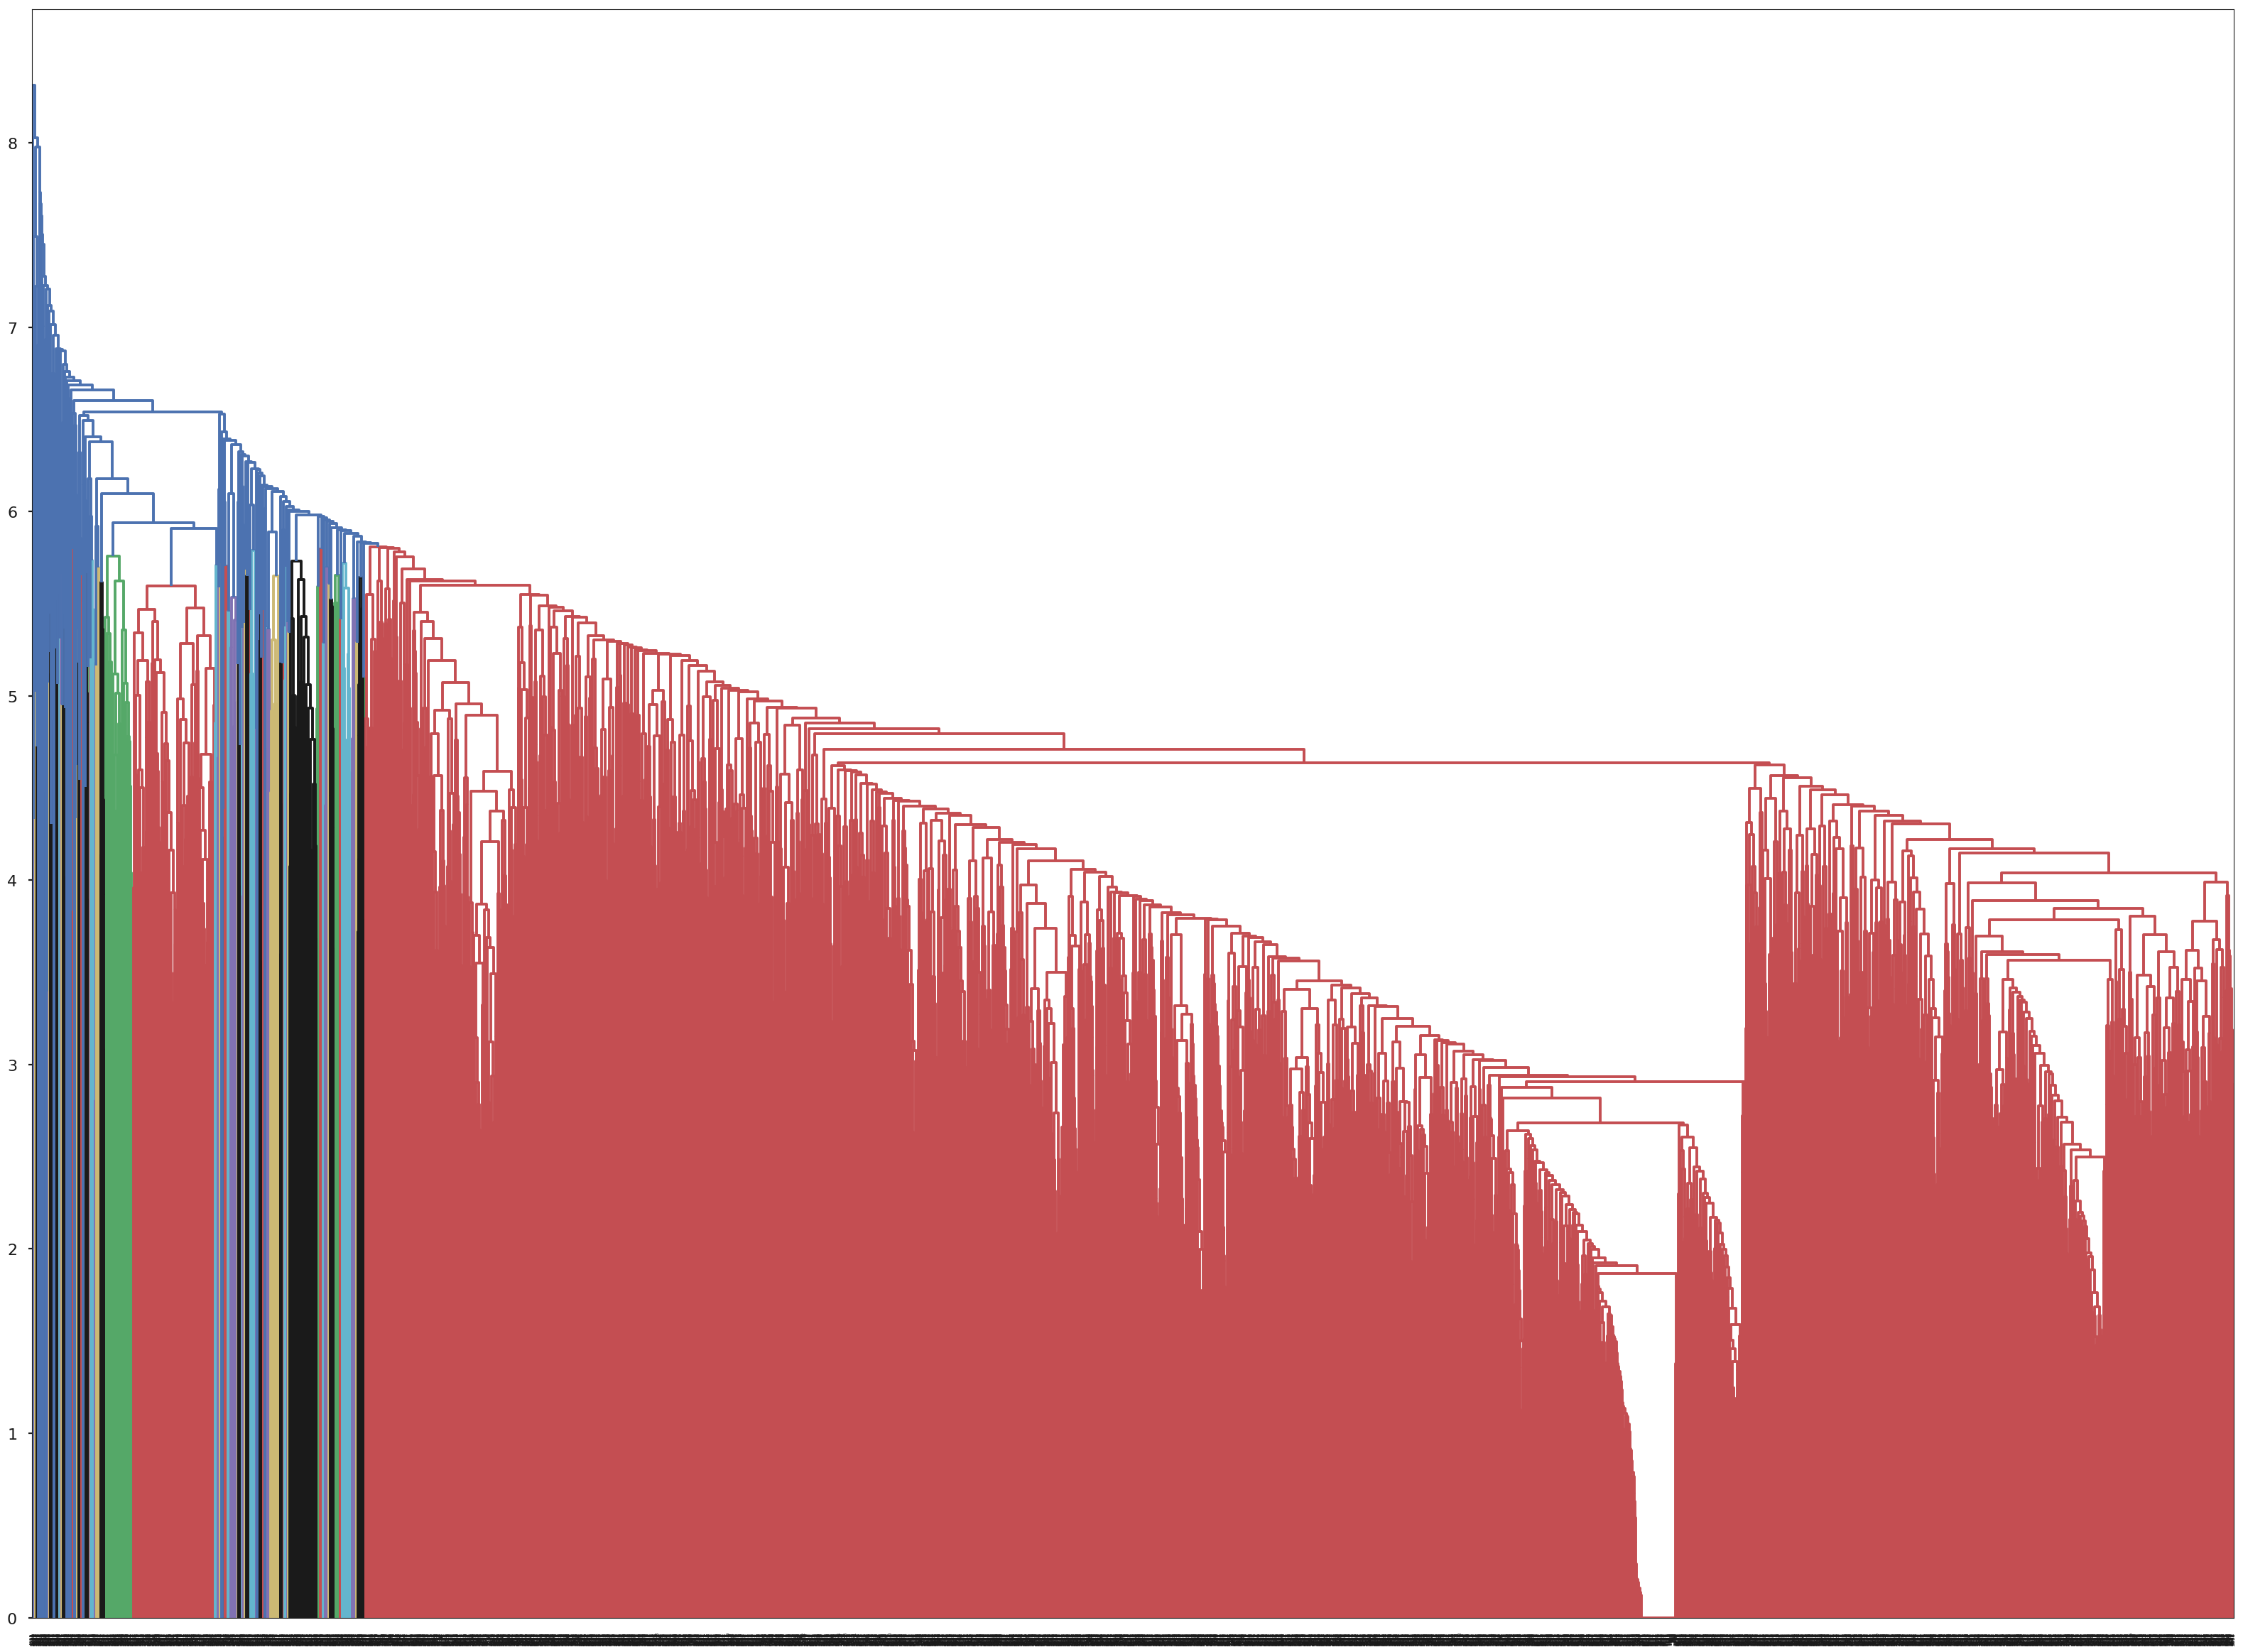

In [43]:
# Agglomerative clustering using scipy
Z = scipy.cluster.hierarchy.linkage(listV, method='average')
plt.clf()
fig = plt.figure(figsize=(100, 60), dpi=100, facecolor='w', edgecolor='k')
dd = scipy.cluster.hierarchy.dendrogram(Z)
plt.savefig('{}.pdf'.format('average'))
plt.show()

# Use cophenetic correlation for evaluation 

In [44]:
c, coph_dists = scipy.cluster.hierarchy.cophenet(Z, pdist(listV))
print("c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c="+repr(c))

c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.70442369787527903


In [45]:
#agglomerative clustering using sklearn 
data1 = []
for k,v in nucrmap.items():
    data1.append(v)
np.save('123', np.array(data1))
data1 = np.load('123.npy')

In [46]:
# get number of clusters from above plot and generate clusters dictionary
model = cluster.AgglomerativeClustering(linkage='average', n_clusters=11)
result = model.fit_predict(listV)
clusters = {}
for i in range(len(result)):
    k = result[i]
    v = data1[i]
    clusters.setdefault(k, []).append(v)

In [47]:
# user index corresponding to user vector dictionary
index = random.randint(0,len(listK)-1)

In [48]:
# Average Vector for each cluster generated above

average_vector = {}
for i in list(clusters.keys()):
    average_vector[i] = np.mean(clusters[i], axis=0)
    

In [49]:
# Get the users cluster vector 
user_vector = average_vector[result[index]]

In [50]:
# Perfor inner dot product between user_vector and each business vector

result_bcrmap = {}
for i in nbcrmp:
    result_bcrmap[i] = np.inner(user_vector, nbcrmp[i])

In [51]:
# Sort the business based on the minimum value of above operation. Keep top 20 businesses
top_business = sorted(result_bcrmap.items(), key=lambda x:(-x[1]))[1:20]

In [52]:
# print out the recommended businesses

for k,v in top_business:
    print(business_name[k])

Eatt Gourmet Bistro,7865 W Sahara Ave, Ste 104 & 105,Las Vegas,NV
Kaffe Live,5135 S Fort Apache Rd, Ste 145,Las Vegas,NV
Gilligan's HideAway,2601 Atlantic St,Las Vegas,NV
Woods Family Sandwiches,931 American Pacific Dr, Ste 106,Henderson,NV
Payless Pizza #2 and Ribs,5785 W Tropicana Ave,Las Vegas,NV
Niko's Pizza Las Vegas,4555 S Fort Apache Rd, Ste 112,Las Vegas,NV
Champagne Life,2831 St Rose Pkwy, Ste 308,Henderson,NV
Modern Proteins,6475 W Charleston Blvd, Ste 110,Las Vegas,NV
Blaqcat Ultra Hookah Lounge,6340 W Charleston Blvd, Ste 140,Las Vegas,NV
Rachel's Kitchen,888 W Bonneville Ave,Las Vegas,NV
Snack Bar,1220 E Harmon Ave, Ste A,Las Vegas,NV
Aroma Cuisine of the World/Oscar Catering,6370 W Flamingo Rd, Ste 30,Las Vegas,NV
Playa Papagayos,4760 W Sahara Ave, Ste 21,Las Vegas,NV
Costa Del Sol At Sunset Station,1301 W Sunset Road,Henderson,NV
King's  Sausage,,Las  Vegas,NV
KIT's Kitchen,2021 W Sunset Rd,Henderson,NV
Greens and Proteins,8975 S Eastern Ave,Las Vegas,NV
Served,1770 W Ho

In [54]:
def generate_recommendatioin(uid):
    index = listK.index(uid)
    uvector = average_vector[result[index]]
    r = {}
    for i in nbcrmp:
        r[i] = np.inner(uvector, nbcrmp[i])
    top_business = sorted(r.items(), key=lambda x:(-x[1]))[1:100]
    return [k for k,v in top_business]

In [60]:
def cacluate_hr(uid, bids):
    score = 0
    count = 0
    for bid in bids:
        if bid in valid_test_user[uid]:
            count += 1
            if valid_test_user[uid][bid] > 3.7:
                score += 1
            if valid_test_user[uid][bid] < 2.6:
                score -= 1
    return np.array([score, count])

In [61]:
def evaluate(list_test):
    hr = np.array([0,0])
    for uid in list_test:
        recs = generate_recommendatioin(uid)
        tmp = cacluate_hr(uid, recs)
        hr += tmp
    print(hr[0]/hr[1])

In [62]:
evaluate(valid_list)

0.618181818182
